# WeatherPy
----

### Observations
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). While it seems like the northern hemisphere tends to be warmer this time of year in the scatter plot than the southern hemisphere, it is very important to note that there is no data available for cities in the southern hemisphere between -60 degrees and - 90 degrees latitude (as compared to the relative abundance of data, all the way up to 80 degrees latitude in the northern hemisphere. 
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 20, 40, ~80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. 
* There is no strong relationship between latitude and humidity.
* It is interesting to see that, when looking at longitude vs. max. temp, most cities analyzed have temperatures between 0 and 50C for this time of the year, indicating the cities analyzed are mostly from the parts of the world experiencing the summer season.
* Also, while looking at longitude vs. other variables(humidity, cloudiness), there does not seem to be any discernable trends.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("Output Data","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs, 
lat_lngs = []
cities = []
countries = []
citycountry = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city,associated country and a combined "city,country" string for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    city_country=str(city) + "," + str(country)
    # If the city is unique, then add it to our cities list, 
    if city not in cities:
        cities.append(city)
        countries.append(country)
        citycountry.append(city_country)

# Print the city count to confirm sufficient count
print(f'The number of cities is {len(cities)}.')

The number of cities is 631.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}&appid={api_key}&units={units}&q="



# create lists to hold lat, lon, windspeed, cloudiness, etc.
Lat = []
Lon = []
Temp = []
Wind = []
Cloud = []
Hum = []
City = []
Country = []
Date = []


#set the counter to zero for record number keeping
counter = 1

print(f'Beginning Data Retrieval')
print(f'---------------------------')


for city in citycountry:
    try:
        # assemble url and make API request, add to the respective lists, and create print log for each API call
        finalurl= query_url + city
        response = requests.get(finalurl).json()
        print(f"Processing record no.{counter}|{city}.")
        counter = counter + 1
        Lat.append(response['coord']['lat'])
        Lon.append(response['coord']['lon'])
        Temp.append(response['main']['temp_max'])
        Wind.append(response['wind']['speed'])
        Cloud.append(response['clouds']['all'])
        Hum.append(response['main']['humidity'])
        City.append(response['name'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        time.sleep(1.01)
    except:
        print("City not found... skipping.")

print('--------------------------')
print('Data Retrieval Complete')
print('--------------------------')

Beginning Data Retrieval
---------------------------
Processing record no.1|new norfolk,au.
Processing record no.2|ushuaia,ar.
Processing record no.3|gavle,se.
Processing record no.4|ahuimanu,us.
Processing record no.5|punta arenas,cl.
Processing record no.6|busselton,au.
Processing record no.7|namibe,ao.
Processing record no.8|denpasar,id.
Processing record no.9|castro,cl.
Processing record no.10|puerto ayora,ec.
Processing record no.11|ponta do sol,cv.
Processing record no.12|leshukonskoye,ru.
Processing record no.13|tasiilaq,gl.
Processing record no.14|rairangpur,in.
Processing record no.15|bluff,nz.
Processing record no.16|avarua,ck.
Processing record no.17|rocha,uy.
Processing record no.18|nanortalik,gl.
Processing record no.19|batagay-alyta,ru.
Processing record no.20|lebu,cl.
Processing record no.21|albany,au.
Processing record no.22|vagay,ru.
Processing record no.23|arraial do cabo,br.
Processing record no.24|atuona,pf.
Processing record no.25|half moon bay,us.
Processing recor

Processing record no.192|ondorhaan,mn.
City not found... skipping.
Processing record no.193|provideniya,ru.
Processing record no.194|durusu,tr.
Processing record no.195|kununurra,au.
Processing record no.196|nokaneng,bw.
Processing record no.197|altay,cn.
Processing record no.198|avera,pf.
City not found... skipping.
Processing record no.199|pop,uz.
Processing record no.200|attawapiskat,ca.
City not found... skipping.
Processing record no.201|tabiauea,ki.
City not found... skipping.
Processing record no.202|ilulissat,gl.
Processing record no.203|palmer,us.
Processing record no.204|xinyu,cn.
Processing record no.205|havre-saint-pierre,ca.
Processing record no.206|the valley,ai.
Processing record no.207|paracatu,br.
Processing record no.208|leningradskiy,ru.
Processing record no.209|belgrade,us.
Processing record no.210|raudeberg,no.
Processing record no.211|san cristobal,ec.
Processing record no.212|yining,cn.
Processing record no.213|lethem,gy.
Processing record no.214|cap malheureux,m

Processing record no.386|taoudenni,ml.
Processing record no.387|aksu,cn.
Processing record no.388|le creusot,fr.
Processing record no.389|fasa,ir.
Processing record no.390|sumbe,ao.
Processing record no.391|korhogo,ci.
Processing record no.392|nicoya,cr.
Processing record no.393|srednekolymsk,ru.
Processing record no.394|borivka,ua.
Processing record no.395|port hardy,ca.
Processing record no.396|front royal,us.
Processing record no.397|luganville,vu.
Processing record no.398|saint george,bm.
Processing record no.399|sawtell,au.
Processing record no.400|kirakira,sb.
Processing record no.401|bulaevo,kz.
Processing record no.402|clyde river,ca.
Processing record no.403|saint combs,gb.
City not found... skipping.
Processing record no.404|bur gabo,so.
City not found... skipping.
Processing record no.405|peniche,pt.
Processing record no.406|manthani,in.
Processing record no.407|tommot,ru.
Processing record no.408|rio gallegos,ar.
Processing record no.409|guajara-mirim,br.
City not found... 

Processing record no.580|la ronge,ca.
Processing record no.581|agadez,ne.
Processing record no.582|bay roberts,ca.
Processing record no.583|korla,cn.
Processing record no.584|nkan,ga.
City not found... skipping.
Processing record no.585|shaoguan,cn.
Processing record no.586|palampur,in.
Processing record no.587|nova olimpia,br.
Processing record no.588|tumannyy,ru.
City not found... skipping.
Processing record no.589|tiznit,ma.
Processing record no.590|dawlatabad,af.
Processing record no.591|iisalmi,fi.
Processing record no.592|terra boa,br.
Processing record no.593|puquio,pe.
Processing record no.594|tiksi,ru.
Processing record no.595|syracuse,it.
City not found... skipping.
Processing record no.596|otjimbingwe,na.
Processing record no.597|nabire,id.
Processing record no.598|warqla,dz.
City not found... skipping.
Processing record no.599|sinop,tr.
Processing record no.600|gazni,af.
City not found... skipping.
Processing record no.601|high level,ca.
Processing record no.602|darhan,mn.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
citydata=pd.DataFrame({"City":City,"Country":Country,"Latitude":Lat,"Longitude": Lon,
                      "Max. Temp.(C)": Temp, "Humidity(%)": Hum, "Cloudiness(%)": Cloud,
                      "Windspeed(mph)": Wind, "Date": Date})
citydata=citydata.drop_duplicates(["City","Country"])
#print count for the df to ensure there are >500 cities
print(citydata.count())
#print the output csv file and drop the index column
output = citydata.to_csv(output_data_file, index=False)
output
#Preview the dataframe
citydata.head()
#previewing the dataframe revealed that date column was in unix format. 
#convert date from unix timestamp to yyyy-mm-dd
from datetime import datetime, timedelta
start = datetime(1970, 1, 1)  # Unix epoch start time
citydata['Date'] = citydata['Date'].apply(lambda x: start + timedelta(seconds=x))
citydata['Date'] = citydata['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
#preview the dataframe again
citydata.head()

City              539
Country           539
Latitude          539
Longitude         539
Max. Temp.(C)     539
Humidity(%)       539
Cloudiness(%)     539
Windspeed(mph)    539
Date              539
dtype: int64


,City,Country,Latitude,Longitude,Max. Temp.(C),Humidity(%),Cloudiness(%),Windspeed(mph),Date
0,New Norfolk,AU,-42.78,147.06,11.11,66,75,3.60,2019-07-23
1,Ushuaia,AR,-54.81,-68.31,1.00,80,75,3.60,2019-07-23
2,Gavle,SE,60.67,17.14,15.56,84,55,0.89,2019-07-23
3,Ahuimanu,US,21.44,-157.84,29.00,83,75,3.10,2019-07-23
4,Punta Arenas,CL,-53.16,-70.91,2.00,70,0,9.80,2019-07-23


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

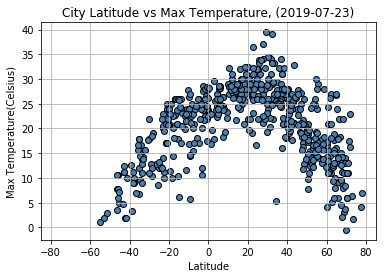

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(y=citydata["Max. Temp.(C)"],x=citydata["Latitude"], color="#4682b4",
            edgecolors="black",marker='o',alpha=1)
plt.title(f'City Latitude vs Max Temperature, ({citydata["Date"][0]})')
plt.ylabel('Max Temperature(Celsius)')
plt.xlabel('Latitude')
plt.xlim(-85,85)
plt.grid(True)
plt.show()
plt.savefig("Latitude vs. Max. Temperature.png",format='png',dpi=1500)

#### Latitude vs. Humidity Plot

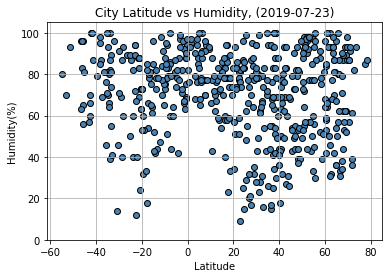

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(y=citydata["Humidity(%)"],x=citydata["Latitude"], color="#4682b4",
            edgecolors="black",marker='o',alpha=1)
plt.title(f'City Latitude vs Humidity, ({citydata["Date"][0]})')
plt.ylabel('Humidity(%)')
#Set ylim to ignore 200%+ humidity values for Iquitos,PE and Paita, PE, which are most likely typos 
plt.ylim(0,105)
plt.xlabel('Latitude')
plt.grid(True)
plt.show()
plt.savefig("City Latitude vs. Humidity.png",format='png',dpi=1500)

#### Latitude vs. Cloudiness Plot

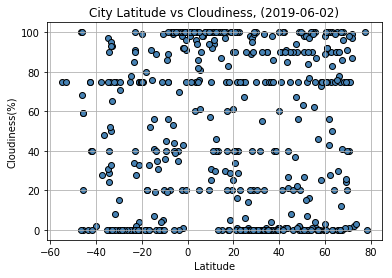

<Figure size 432x288 with 0 Axes>

In [7]:
plt.scatter(y=citydata["Cloudiness(%)"],x=citydata["Latitude"], color="#4682b4",
            edgecolors="black",marker='o',alpha=1)
plt.title(f'City Latitude vs Cloudiness, ({citydata["Date"][0]})')
plt.ylabel('Cloudiness(%)')
#Set ylim for optimal view of datapoints
plt.ylim(-5,105)
plt.xlabel('Latitude')
plt.grid(True)
plt.show()
plt.savefig("City Latitude vs. Cloudiness.png",format=png,dpi=1500)

#### Latitude vs. Wind Speed Plot

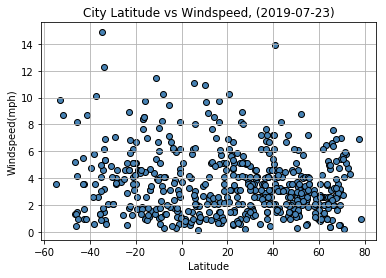

<Figure size 432x288 with 0 Axes>

In [18]:
plt.scatter(y=citydata["Windspeed(mph)"],x=citydata["Latitude"], color="#4682b4",
            edgecolors="black",marker='o',alpha=1)
plt.title(f'City Latitude vs Windspeed, ({citydata["Date"][0]})')
plt.ylabel('Windspeed(mph)')
plt.xlabel('Latitude')
plt.grid(True)
plt.show()
plt.savefig("City Latitude vs. Windspeed.png",format='png',dpi=1500)

In [9]:
#### Longitude vs. Humidity Plot

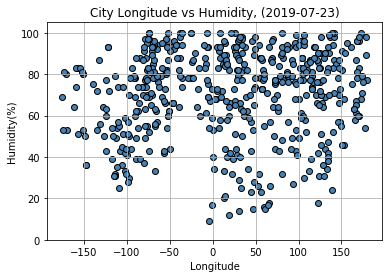

<Figure size 432x288 with 0 Axes>

In [17]:
plt.scatter(y=citydata["Humidity(%)"],x=citydata["Longitude"], color="#4682b4",
            edgecolors="black",marker='o',alpha=1)
plt.title(f'City Longitude vs Humidity, ({citydata["Date"][0]})')
plt.ylabel('Humidity(%)')
#Set ylim to ignore 200%+ humidity values for Iquitos,PE and Paita, PE, which are most likely typos 
plt.ylim(0,105)
plt.xlabel('Longitude')
plt.grid(True)
plt.show()
plt.savefig("City Longitude vs. Humidity.png",format='png',dpi=1500)

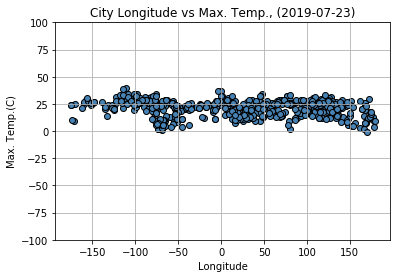

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(y=citydata["Max. Temp.(C)"],x=citydata["Longitude"], color="#4682b4",
            edgecolors="black",marker='o',alpha=1)
plt.title(f'City Longitude vs Max. Temp., ({citydata["Date"][0]})')
plt.ylabel('Max. Temp.(C)')
#Set ylim to ignore 200%+ humidity values for Iquitos,PE and Paita, PE, which are most likely typos 
plt.ylim(-100,100)
plt.xlabel('Longitude')
plt.grid(True)
plt.show()
plt.savefig("City Longitude vs. Max. Temp(C).png",format='png',dpi=1500)

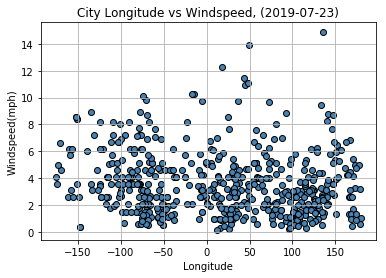

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(y=citydata["Windspeed(mph)"],x=citydata["Longitude"], color="#4682b4",
            edgecolors="black",marker='o',alpha=1)
plt.title(f'City Longitude vs Windspeed, ({citydata["Date"][0]})')
plt.ylabel('Windspeed(mph)')
plt.xlabel('Longitude')
plt.grid(True)
plt.show()
plt.savefig("City Longitude vs. Windspeed(mph).png",format='png',dpi=1500)